In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Npop = 1000 case

[[9.73730262e+00 2.08333333e+01 4.67390526e-01]
 [1.03638260e-72 2.36229056e+01 4.38719359e-74]
 [9.29084358e+00 2.49662850e-91 3.72135605e+91]
 [6.40401767e-77 1.22522544e-12 5.22680761e-65]]


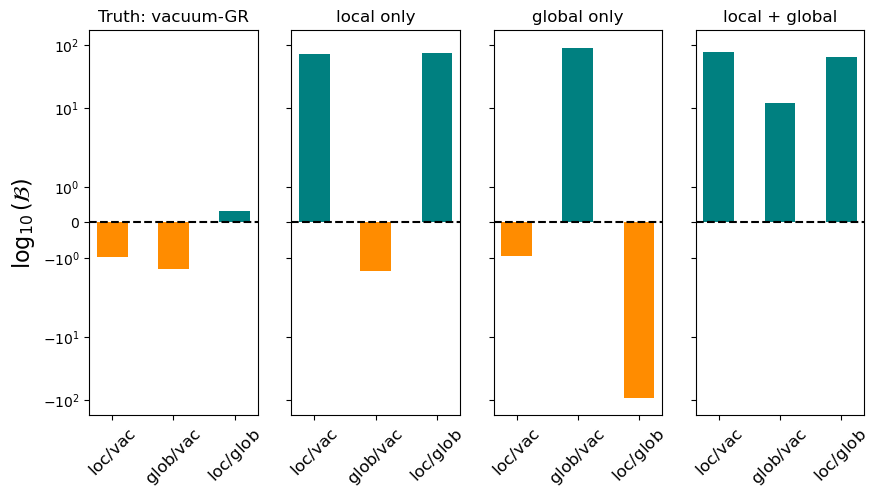

In [85]:
Npop = 1000
file_vac = f"Hierarchical_Npop_{Npop}_f_0.0_Gdot_0.0_K_0.005_alpha_0.2_beta_0.2"
file_loc = f"Hierarchical_Npop_{Npop}_f_0.5_Gdot_0.0_K_0.005_alpha_0.2_beta_0.2"
file_glob = f"Hierarchical_Npop_{Npop}_f_0.0_Gdot_1e-13_K_0.005_alpha_0.2_beta_0.2"
file_mix = f"Hierarchical_Npop_{Npop}_f_0.5_Gdot_1e-13_K_0.005_alpha_0.2_beta_0.2"

SD_ratios = []
for file in [file_vac,file_loc,file_glob,file_mix]:
    SD_ratios.append(np.loadtxt(f"{file}/SD_ratios.txt"))

SD_ratios = np.array(SD_ratios)[:,:]
print(SD_ratios)

plot_title = ['Truth: vacuum-GR', 'local only', 'global only', 'local + global']
x_labels = [r'${\rm loc}/{\rm vac}$', r'${\rm glob}/{\rm vac}$', r'${\rm loc}/{\rm glob}$']#, r'${\rm loc}/{\rm glob}$']  # Names for different ratios

bar_width = 0.2

fig, axs = plt.subplots(1,4,figsize=(10,5),sharey=True)
plt.subplots_adjust(wspace=0.2)
for i, ax in enumerate(axs):
    for j in range(len(SD_ratios[0])):
        if np.log(SD_ratios[i,j])>0.0:
            ax.bar(j, np.log10(1/(SD_ratios[i,j])),width=0.5,color='darkorange')
        else:
            ax.bar(j, np.log10(1/(SD_ratios[i,j])),width=0.5,color='teal')
    ax.set_yscale('symlog')
    if i == 0:
        ax.set_ylabel(r'$\log_{10}(\mathcal{B})$',fontsize=16)
    ax.axhline(0.0,color='k',linestyle='--')
    ax.set_xticks(np.arange(len(SD_ratios[0])))  # Center x-ticks
    ax.set_xticklabels(x_labels,fontsize=12, rotation=45)
    ax.set_title(plot_title[i])

plt.savefig(f'Bayes_factors_summary_Npop_{Npop}.png',dpi=300,bbox_inches='tight')
plt.show()

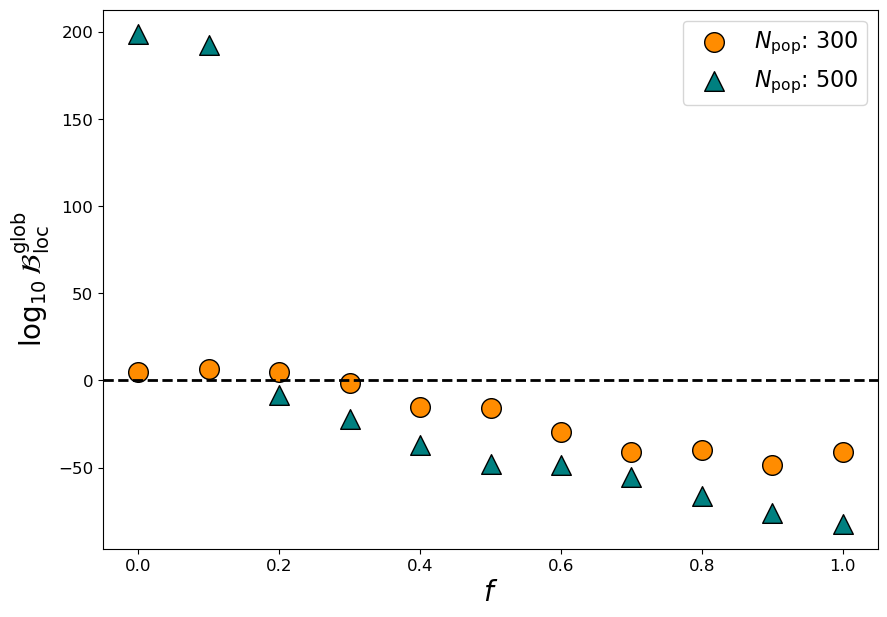

In [97]:
#load all three SDs (namely, SD^vac_loc, SD^vac_glob, SD^glob_loc)

#True size of the population
Npop_range = [
    int(3e2), 
    int(5e2), 
] #INCREASE TO 1e3 LATER?

facecolors = [
    'darkorange', 
    'teal', 
] 

markers = [
    'o',
    '^',
]

edgecolors = [
    'black', 
    'black',
] 

alphas = [
    1.0,
    1.0,
]

N_fs = 11 #grid size over the fraction of EMRIs with a local effect

f_range = np.linspace(0.0,1.0,N_fs) #grid of fraction of EMRIs with a local effect

true_Gdot = 1e-13
true_K = 5e-3
true_alpha = 0.2
true_beta = 0.2

plt.figure(figsize=(10,7))

for j in range(len(Npop_range)):

    Npop = Npop_range[j]

    parent_filename = f'Hierarchical_Npop_{Npop}_varied_f_fmax_{f_range[-1]}_Gdot_{true_Gdot}_K_{true_K}_alpha_{true_alpha}_beta_{true_beta}'

    savage_dickeys_variedf = {}
    
    for i in range(len(f_range)):    
        
        f = f_range[i]
    
        filename = parent_filename + f'/f_{f}' #folder with all the analysis data and plots
        
        savage_dickeys_variedf[f'{f}'] = np.loadtxt(f'{filename}/SD_ratios.txt')

    plt.scatter(f_range, np.log10(np.array(list(savage_dickeys_variedf.values()))[:,2]),facecolor=facecolors[j], edgecolor=edgecolors[j], marker = markers[j], s=200, label=r'$N_{\rm pop}$: '+f'{Npop}', alpha = alphas[j])

plt.axhline(np.log10(1.0),linestyle='--',linewidth='2',color='k')
    
plt.legend(fontsize=16)
#plt.yscale('symlog')
plt.xlabel(r'$f$',fontsize=20)
plt.ylabel(r'$\log_{10}{\mathcal{B}^{\rm glob}_{\rm loc}}$',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(f'SD_vs_f_summary_edge.png', dpi=300, bbox_inches='tight')
plt.show()

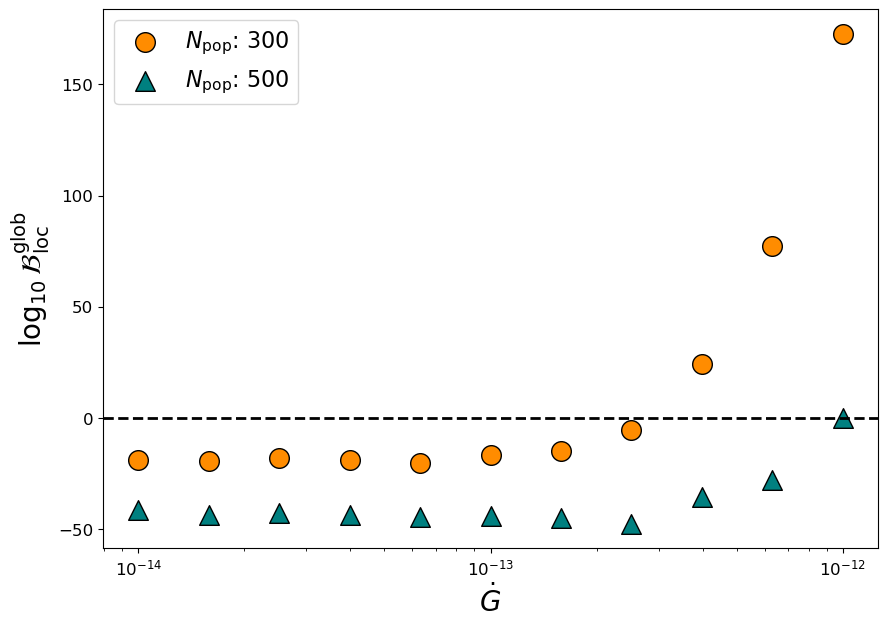

In [98]:
#load all three SDs (namely, SD^vac_loc, SD^vac_glob, SD^glob_loc)

#True size of the population
Npop_range = [
    int(3e2), 
    int(5e2), 
] 
#INCREASE TO 1e3 LATER?

facecolors = [
    'darkorange', 
    'teal', 
] 

markers = [
    'o',
    '^',
]

edgecolors = [
    'black', 
    'black',
] 

alphas = [
    1.0,
    1.0,
]

N_Gdots = 11
Gdot_range = np.geomspace(1e-14, 1e-12, N_Gdots)

f = 0.5
true_K = 5e-3
true_alpha = 0.2
true_beta = 0.2

plt.figure(figsize=(10,7))

for j in range(len(Npop_range)):

    Npop = Npop_range[j]

    parent_filename = f'Hierarchical_varied_Gdot_Gdotmax_{Gdot_range[-1]}_Npop_{Npop}_f_{f}_K_{true_K}_alpha_{true_alpha}_beta_{true_beta}'

    savage_dickeys_variedGdot = {}
    
    for i in range(len(Gdot_range)):    
        
        true_Gdot = Gdot_range[i]
    
        filename = parent_filename + f'/Gdot_{true_Gdot}'     
        
        savage_dickeys_variedGdot[f'{true_Gdot}'] = np.loadtxt(f'{filename}/SD_ratios.txt')

    mask = Gdot_range <= 1e-10
    
    plt.scatter(Gdot_range[mask], np.log10(np.array(list(savage_dickeys_variedGdot.values()))[:,2])[mask],facecolor=facecolors[j], edgecolor=edgecolors[j], marker = markers[j], s=200, label=r'$N_{\rm pop}$: '+f'{Npop}', alpha = alphas[j])

plt.axhline(np.log10(1.0),linestyle='--',linewidth='2',color='k')

plt.legend(fontsize=16)
plt.xscale('log')
plt.xlabel(r'$\dot{G}$',fontsize=20)
plt.ylabel(r'$\log_{10}{\mathcal{B}^{\rm glob}_{\rm loc}}$',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(f'SD_vs_Gdot_summary_edge.png', dpi=300, bbox_inches='tight')
plt.show()

[1.00039321 0.99725516 0.99221365 0.99130078 0.99512052 0.99647034
 0.99525659 0.99408918 0.99491469 0.99409204 0.99424486]
[0.20442573 1.36242213 2.73224735 0.8762488  0.7678762  0.81019915
 0.82978737 0.78855006 0.98997356 0.99685739 0.92048618]
[0.99414939 1.00399027 1.00308521 0.98877621 0.99638509 1.00028682
 0.99870812 0.99794093 0.99856606 0.99897801 0.99576661]


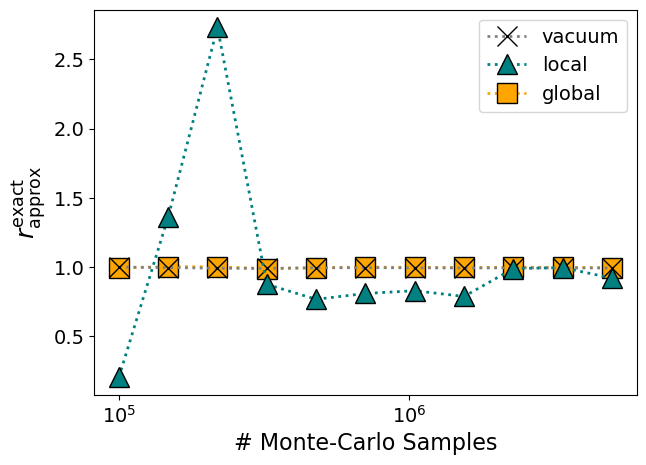

In [126]:
# integral validation

from matplotlib.ticker import FuncFormatter, NullLocator

Ngridsize = 11
Nrange = [int(1e5), int(5e6)]
Ngrid = np.geomspace(Nrange[0], Nrange[1], Ngridsize).astype(int)

hyps = ['vacuum', 'local', 'global']
colors = ['grey', 'teal', 'orange']
alphas = [1.0, 1.0, 1.0]
linestyles = [':',':',':']
markers = ['x','^','s']
sizes = [15, 15, 15]
zorders = [2, 3, 1]

plt.figure(figsize=(7, 5))
ax = plt.gca()

for i in range(len(hyps)):
    hypothesis = hyps[i]
    filename = f'validation_{hypothesis}'
    integral_all = np.loadtxt(f"{filename}/integral_all.txt")
    print(integral_all)
    ax.semilogx(Ngrid, integral_all, marker=markers[i], markersize = sizes[i], linestyle=linestyles[i], linewidth=2, color=colors[i], markeredgecolor = 'black', label=hypothesis, alpha=alphas[i], zorder=zorders[i])

#ax.set_xscale('log')
ax.xaxis.set_minor_locator(NullLocator())

# Labels and formatting
## Custom scientific notation formatter for *exact* Ngrid values
formatter = FuncFormatter(lambda x, _: f"{x:.1e}")
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel("# Monte-Carlo Samples", fontsize=16)
ax.set_ylabel(r"$r^{\rm exact}_{\rm approx}$", fontsize=18)
ax.legend(fontsize=14)

# Save and show
plt.savefig("integral_validation.png", bbox_inches='tight', dpi=300, transparent=False)
plt.show()
